Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64


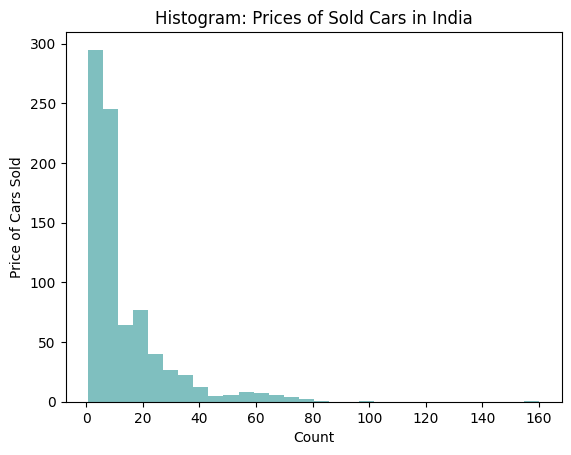

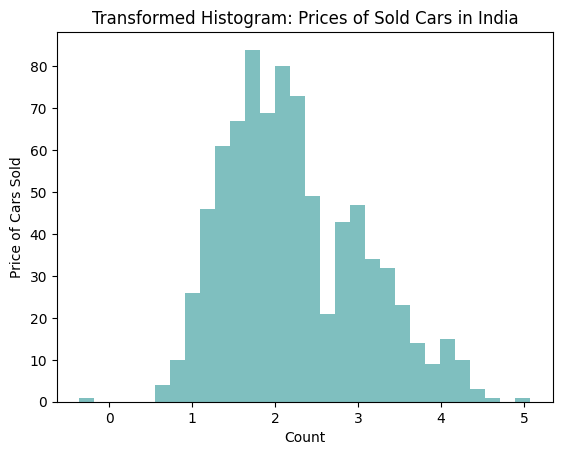

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     783.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          4.70e-278
Time:                        20:14:45   Log-Likelihood:                -367.65
No. Observations:                 823   AIC:                             745.3
Df Residuals:                     818   BIC:                             768.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -222.0914     13.47

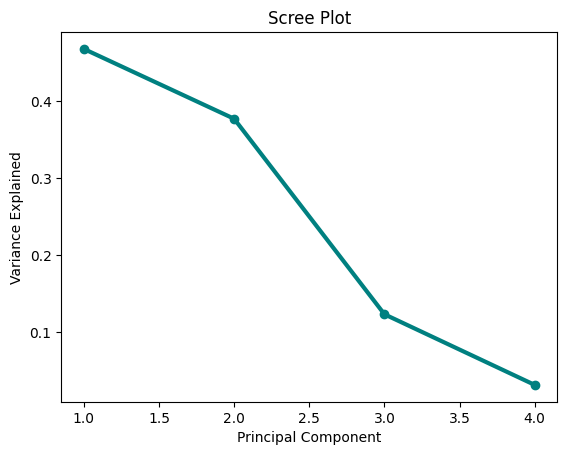

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     844.5
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          7.47e-200
Time:                        20:14:46   Log-Likelihood:                -555.76
No. Observations:                 823   AIC:                             1118.
Df Residuals:                     820   BIC:                             1132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2285      0.017    134.243      0.0

In [1]:
#Nedim Hodzic
#T54-574
#Lab 06 - Due 10/20/2022 @ 11:59 P.M.

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#We’ll be using the train.csv data set for this lab. The data set covers the characteristics and prices for 
#used cars sold in India. We are interested in predicting the price of a car given some characteristics. For 
#today we will focus on Price, Power, Engine, Kilometers Driven, and Year, and we will attempt to build a 
#linear regression model of Price. 

#1. Visualize the distribution of price
#Read csv
df1 = pd.read_csv('/Users/nedim/Downloads/train.csv')

#Show all null values
print(df1.isnull().sum())
#Delete null values
df1=df1.dropna()
#Verify null values are deleted
print(df1.isnull().sum())

#Summary statistics
df1.describe()

#Plot distribution
plt.hist(df1['Price'], bins=30, alpha=0.5, color='teal')
plt.title("Histogram: Prices of Sold Cars in India")
plt.xlabel("Count")
plt.ylabel("Price of Cars Sold")
plt.show()

#2. Transform Price so that it looks more normal
df1["Mileage"] = df1["Mileage"].str.rstrip(" kmpl") 
df1["Mileage"] = df1["Mileage"].str.rstrip(" km/g") 
df1["Engine"] = df1["Engine"].str.rstrip(" CC") 
df1["Power"] = df1["Power"].str.rstrip(" bhp") 
df1["Power"]= df1["Power"].replace(regex="null", value = np.nan) 
df1["Fuel_Type"]=df1["Fuel_Type"].astype("category") 
df1["Transmission"]=df1["Transmission"].astype("category") 
df1["Owner_Type"]=df1["Owner_Type"].astype("category") 
df1["Mileage"]=df1["Mileage"].astype("float") 
df1["Power"]=df1["Power"].astype("float") 
df1["Engine"]=df1["Engine"].astype("float") 
df1["Company"]=df1["Name"].str.split(" ").str[0] 
df1["Model"]=df1["Name"].str.split(" ").str[1]+df1["Name"].str.split(" ").str[2]

#To transform price, we'll take the natural log of this variable
df1['Price'] = np.log(df1['Price'])

#Plotting the transformed price
plt.hist(df1['Price'], bins=30, alpha=0.5, color='teal')
plt.title("Transformed Histogram: Prices of Sold Cars in India")
plt.xlabel("Count")
plt.ylabel("Price of Cars Sold")
plt.show()
 
#3. Build a model of transformed price based on the other 4 variables, how much variance is 
#explained? 
#The four other variables are  Power, Engine, Kilometers Driven, and Year
#source: https://www.statsmodels.org/stable/example_formulas.html
lm = ols('Price ~ Year + Kilometers_Driven + Engine + Power', data=df1).fit()
print(lm.summary())
#83% of the variance is explained according to our R^2 value of 0.79

#4. Compute the VIF of each variable, which 2 are potential problems? 

#Note: VIF = Variance Inflation Factor
#Source: https://etav.github.io/python/vif_factor_python.html
#Define variables 
df2 = df1[['Year', 'Kilometers_Driven', 'Engine', 'Power']]
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif['variable'] = df2.columns

#view VIF for each explanatory variable 
print(vif)

#output:
#       VIF           variable
#0  10.456392               Year
#1   3.154782  Kilometers_Driven
#2  36.221722             Engine
#3  21.851568              Power

#In general, a VIF above 10 indicates high correlation and is cause for concern.
#Engine and Power are the two VIF's that are potential problems

#5. Use PCA to create principal components and create a scree plot 
df3=pd.DataFrame(StandardScaler().fit_transform(df2), columns=df2.columns)
#define PCA model to use
#4 components (Year, Kilometers_Drive, Engine, Power)
pca = PCA(n_components=4)
#fit PCA model to data
pca_fit = pca.fit(df3)
#Value assignment + plot
PCvalues = np.arange(pca.n_components_) + 1
plt.plot(PCvalues, pca.explained_variance_ratio_, 'o-', linewidth=3, color='teal')
plt.title('Scree Plot')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.show()

#6. Create / select 2 components and rerun the regression with transformed price, what is the 
#amount of variance explained? 
#Re-running the regression with Power/Engine
df4 = pd.concat([df3, df1['Price'].reset_index(drop=True)], axis = 1)
x = df4[['Power', 'Engine']]
y = df4['Price']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
#R^2 = 0.67, therefore 67% of the variance is explained

#7. What is the VIF of the components? 
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns
print(vif)

#The VIF of the components is: 
# 0 1.000000    const
# 1 3.693346    Power
# 2 3.693346    Engine